In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 80% !important; }</style>"))

In [2]:
# import warnings
# warnings.filterwarnings("default")

In [3]:
import sys
import time
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colors

In [4]:
myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
            '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
            '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
            '#307D7E', '#000000', "#DDEFFF", "#000035", "#7B4F4B", 
            "#A1C299", "#300018", "#C2FF99", "#0AA6D8", "#013349", 
            "#00846F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", 
            "#1E6E00", "#DFFB71", "#868E7E", "#513A01", "#CCAA35"]

colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
import smashpy
sf = smashpy.smashpy()

 * Initialising ...



# Loading annData object

In [7]:
obj = sc.read_h5ad('../../../../External_datasets/Healthy_foetal_organ_20pct.h5ad')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [8]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

23054 genes across 42351 cells


#### Data split

In [9]:
s = time.time()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
data = obj.X.copy()

myDict = {}
for idx, c in enumerate(obj.obs["organ"].cat.categories):
    myDict[c] = idx

labels = []
for l in obj.obs["organ"].tolist():
    labels.append(myDict[l])

labels = np.array(labels)

X = data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### scGeneFit

In [12]:
from scGeneFit.functions import *

In [13]:
markers = get_markers(X_train, y_train, num_markers=30, method="centers", epsilon=1.0, redundancy=0.25)

Solving a linear program with 23054 variables and 4 constraints
Time elapsed: 8308.579452991486 seconds


In [14]:
genes = obj.var.index.tolist()

selectedGenes = [genes[m] for m in markers]

selectedGenes_dict = {}
selectedGenes_dict["group"] = selectedGenes

In [15]:
e = time.time()

#### Classifiers

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1094: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/categorical.py:2487: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



<Figure size 432x288 with 0 Axes>

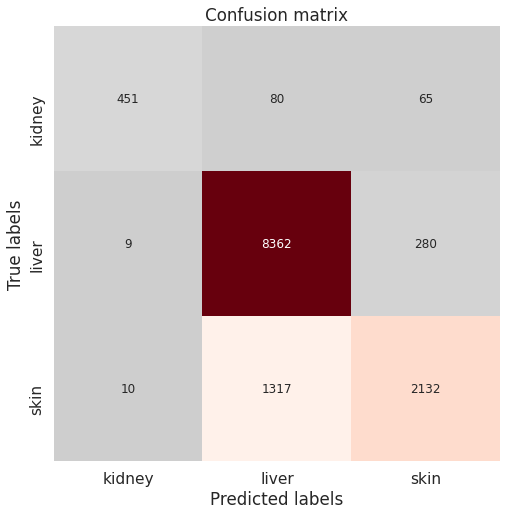

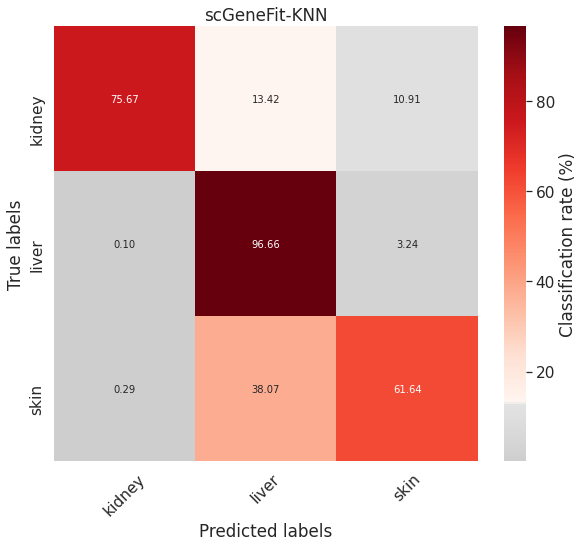

Accuracy: 0.8614040610735085: Misclassification: 0.13859593892649147
              precision    recall  f1-score   support

      kidney       0.96      0.76      0.85       596
       liver       0.86      0.97      0.91      8651
        skin       0.86      0.62      0.72      3459

    accuracy                           0.86     12706
   macro avg       0.89      0.78      0.82     12706
weighted avg       0.86      0.86      0.85     12706



In [16]:
sf.run_classifiers(obj, group_by="organ", genes=selectedGenes, classifier="KNN", balance=True, title="scGeneFit-KNN")

#### Heatmap selected genes

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1192: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



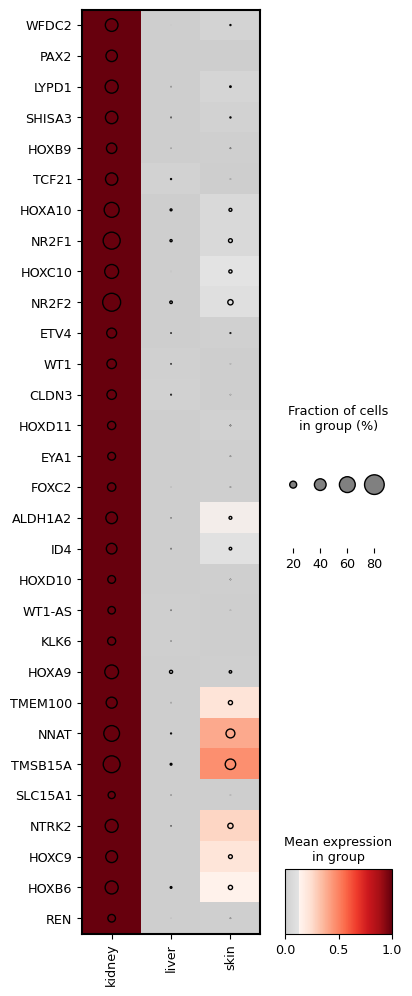

In [17]:
matplotlib.rcdefaults()
matplotlib.rcParams.update({'font.size': 11})
ax = sc.pl.DotPlot(obj,
                   selectedGenes,
                   groupby="organ",
                   standard_scale='var',
                   use_raw=True,
                   figsize=(4,12),
                   linewidths=2).style(cmap=mymap, color_on='square', grid=True, dot_edge_lw=1)
ax.swap_axes(swap_axes=True)
# ax.show()

ax.savefig("Figures/scGeneFit_top30.pdf")

# Elapsed time

In [18]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

23054 genes across 42351 cells


In [19]:
print('Elapsed time (s): ', e-s)

Elapsed time (s):  8312.403236627579
